In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import re



In [5]:
df=pd.read_csv('/content/drive/MyDrive/ML_Summer2023/AIRBNB/AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [6]:
df = df[df['price'] != 0].copy()

print(df['price'].mean())

152.75505277800508


In [7]:
#price and neighborhood relationship
#get all neighborhoods and look at mean price
neighborhood_price = pd.DataFrame([df['neighbourhood'], df['price']])
data = pd.DataFrame(data = np.transpose(neighborhood_price))
data.head()

,neighbourhood,price
0,Kensington,149
1,Midtown,225
2,Harlem,150
3,Clinton Hill,89
4,East Harlem,80


In [8]:
#get unique neighborhoods
unique_neighborhoods = data['neighbourhood'].unique()
unique_neighborhoods.sort()
print(len(unique_neighborhoods))
#there's 221 unique neighborhoods

221


In [9]:
#for each unique neighborhood we want mean price
mean_prices = data.groupby('neighbourhood').mean()
(mean_prices)


,price
neighbourhood,
Allerton,87.595238
Arden Heights,67.250000
Arrochar,115.000000
Arverne,171.779221
Astoria,117.187778
...,...
Windsor Terrace,138.993631
Woodhaven,67.170455
Woodlawn,60.090909


In [10]:
#neighborhoods with more & less expensive prices
print('more expensive')
print(mean_prices[mean_prices['price'] >= 152.71])
print('less expensive')
print(mean_prices[mean_prices['price'] <= 81.73])

more expensive
                         price
neighbourhood                 
Arverne             171.779221
Battery Park City   367.557143
Bayside             157.948718
Belle Harbor        171.500000
Boerum Hill         176.135593
Breezy Point        213.333333
Brooklyn Heights    209.064935
Carroll Gardens     175.914163
Chelsea             249.738544
Chinatown           161.497283
City Island         173.000000
Civic Center        191.942308
Clinton Hill        181.893357
Cobble Hill         211.929293
Columbia St         162.952381
DUMBO               196.305556
East Village        186.083108
Far Rockaway        165.862069
Financial District  225.490591
Flatiron District   341.925000
Fort Wadsworth      800.000000
Gowanus             158.801619
Gramercy            222.754438
Greenwich Village   263.405612
Grymes Hill         159.142857
Hell's Kitchen      204.794178
Jamaica Estates     182.947368
Kips Bay            202.408511
Lighthouse Hill     157.500000
Little Italy        222.

In [11]:
#get all neighborhoods groups and look at mean price
neighborhoodgroup_price = pd.DataFrame([df['neighbourhood_group'], df['price']])
data1 = pd.DataFrame(data = np.transpose(neighborhoodgroup_price))
data1.head()

,neighbourhood_group,price
0,Brooklyn,149
1,Manhattan,225
2,Manhattan,150
3,Brooklyn,89
4,Manhattan,80


In [12]:
mean_group_prices =data1.groupby('neighbourhood_group').mean()
mean_group_prices

,price
neighbourhood_group,
Bronx,87.577064
Brooklyn,124.438915
Manhattan,196.884903
Queens,99.517649
Staten Island,114.812332


In [13]:
mean_group_prices.describe()

,price
count,5.000000
mean,124.646173
std,42.780670
min,87.577064
25%,99.517649
50%,114.812332
75%,124.438915
max,196.884903


Kruskal-Wallis test is a non-parametric hypothesis test that compares three or more independent groups. It is also known as one-way ANOVA on ranks. The test is used to test the null hypothesis that a number of samples have been drawn from the same population.

#Hypothesis Testing

In [14]:
#Neighborhood Group & Price

#List of Neigbourhood Groups
list = df['neighbourhood_group'].unique()

In [15]:
#Create DataFrame for each Neighboorhood group
dfbrook = df.loc[df['neighbourhood_group']==list[0]]
dfman = df.loc[df['neighbourhood_group']==list[1]]
dfque = df.loc[df['neighbourhood_group']==list[2]]
dfst = df.loc[df['neighbourhood_group']==list[3]]
dfbr = df.loc[df['neighbourhood_group']==list[4]]

In [16]:
#Slice each dataframe on price and convert to an numpy array
brook = np.array(dfbrook['price'])
man = np.array(dfman['price'])
que = np.array(dfque['price'])
st = np.array(dfst['price'])
br = np.array(dfbr['price'])

In [17]:
#Remove non-finite elements element wise from each array
brook1 = brook[np.isfinite(brook)]
man1 = man[np.isfinite(man)]
que1 = que[np.isfinite(que)]
st1 = st[np.isfinite(st)]
br1 = br[np.isfinite(br)]

In [18]:
##Kruskal-Wallis H-test for independent samples
h1,p1 = stats.kruskal(brook1, man1, que1, st1, br1)
print(h1)
print(p1)

7023.124698515672
0.0


Alpha value for this test is 0.05 if

P value >0.05 accept H0 which means price doesn't vary with region

P value <0.05 fail to accept H0 (accept HA) means price varies with region





In [19]:
#Total Reviews & Price

#Sort data frame by number of reviews in ascending order
dfsorted = df.sort_values(by=['number_of_reviews'])

#Median split of DataFrame into dataframe frame with less reviews and dataframe with more reviews
lessreviews = dfsorted.iloc[0:24447,:]
morereviews = dfsorted.iloc[24447:48895,:]

In [20]:
#Slice dataframes on price and convert to numpy arrays
lessreviewsprice = np.array(lessreviews['price'])
morereviewsprice = np.array(morereviews['price'])
#Remove non-finite elemetns from numpy arrays
lessreviewsprice = lessreviewsprice[np.isfinite(lessreviewsprice)]
morereviewsprice = morereviewsprice[np.isfinite(morereviewsprice)]

In [21]:
# Two Sided Mann–Whitney U test
u1,p1 = stats.ttest_ind(lessreviewsprice,morereviewsprice)

In [22]:
print(p1)
print(u1)

1.9794338123978367e-37
12.796122094542877


Our null hypothesis is that listings with more
reviews do not have higher prices than listings with fewer reviews. Our alternative hypothesis
is that listings with more ratings have higher prices. We ran a one-tailed independent samples
t-test on the groups and obtained a p-value < 0.005. Therefore, we reject the null hypothesis.
Thus, the data suggests that listings with more reviews have higher prices than listings with
less reviews.

In [23]:
#Number of Host Listings & Price

#Remove rows with nan values for 'calculated_host_listings_count'
dfna = df[df['calculated_host_listings_count'].notna()]

#Sort dataframe by 'calculated_host_listings_count' in ascending order
dfsorted = dfna.sort_values(by=['calculated_host_listings_count'])

dfunique = dfsorted.drop_duplicates(subset='host_id', keep="first")


In [24]:
#Median split into two dataframes with low host listing count and high host listing count
lowhlc = dfsorted.iloc[0:24447,:]
highhlc = dfsorted.iloc[24447:48895,:]

##Slice and convert to numpy array of price of low host listing count and numpy array of price of high host listing count
lowhlcprice = np.array(lowhlc['price'])
highhlcprice = np.array(highhlc['price'])

#Remove nan values from numpy arrays element wise
lowhlcprice = lowhlcprice[np.isfinite(lowhlcprice)]
highhlcprice = highhlcprice[np.isfinite(highhlcprice)]

In [25]:
#Independent Samples T-test
t1,p4 = stats.ttest_ind(lowhlcprice,highhlcprice, alternative = 'greater')

In [26]:
print(t1)
print(p4)

5.80002830697294
3.3355540475105067e-09


Our null hypothesis is that listings by hosts with
more listings are not priced higher than listings by hosts with less listings. We ran a one-tailed
independent samples t-test on the groups and obtained a p-value < 0.005, leading us to reject the
null hypothesis. Thus, listings by hosts with more listings are priced higher than listings by
hosts with less listings. This may be due to the reason that hosts with more listings are affluent
and are able to maintain their properties and hence charge higher prices. It is also possible that
hosts with more listings earn a major chunk of their income from airbnb rentals and treat it as a
business.

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_squared_log_error
from sklearn.metrics import r2_score

In [28]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10051
reviews_per_month                 10051
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [29]:
#data pre-processing
#make price last column
df['listing_price'] = df['price']
df1 = df.drop(['price'], axis=1)
df1.head()

#data cleansing and column drops of last_review and reviews_per_month as we're missing too much data here and availability_365 as it doesn't provide useful information
#df1.isnull().sum()
df1 = df1.drop(['last_review', 'reviews_per_month'], axis=1)
df1 = df1.dropna()

#drop some other columns we won't use for correlations/regression
df1 = df1.drop(['name', 'host_name'], axis=1)
df1.shape #we are left with 10 predictor variables

(48847, 12)

In [30]:
#we also need to numerically encode some of our data - we will do this for neighbourhood, neighbourhood_group and room_type
df1['neighborhood'] = df1['neighbourhood'].astype('category')
df1['neighborhood'] = df1['neighborhood'].cat.codes

df1['neighborhood_group'] = df1['neighbourhood_group'].astype('category')
df1['neighborhood_group'] = df1['neighborhood_group'].cat.codes

df1['accomodation'] = df1['room_type'].astype('category')
df1['accomodation'] = df1['accomodation'].cat.codes

#finalized df
df1 = df1[['neighbourhood_group', 'neighbourhood', 'room_type', 'id', 'host_id', 'latitude', 'longitude',
           'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'neighborhood',
          'neighborhood_group', 'accomodation', 'availability_365', 'listing_price']]

In [31]:
#outlier removal
min_thres, max_thres = df1.listing_price.quantile([0.05,0.95])
df1 = df1[(df1.listing_price > min_thres) & (df1.listing_price < max_thres)]

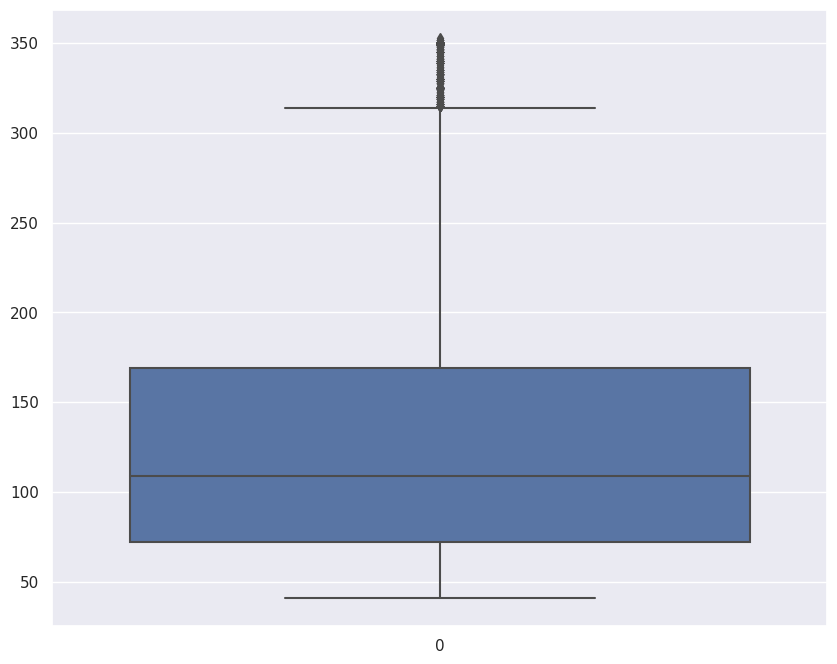

In [32]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,8)})
sns.boxplot(df1.listing_price);

<ipython-input-33-bd4c96ba7dff>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1.listing_price);


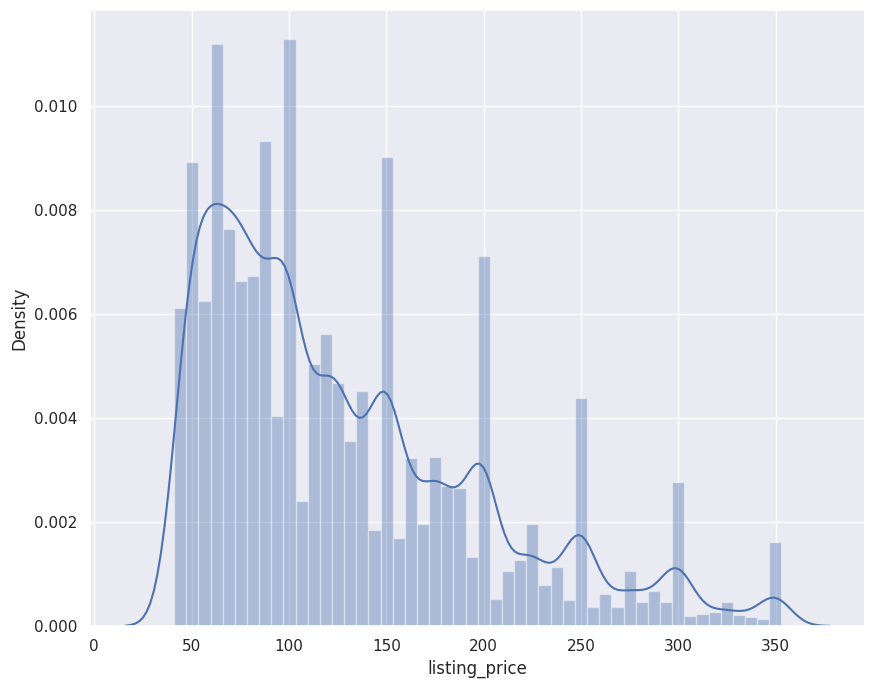

In [33]:
sns.set(rc = {'figure.figsize':(10,8)})
sns.distplot(df1.listing_price);

In [34]:
df.corr()

<ipython-input-34-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,listing_price
id,1.000000,0.588316,-0.003115,0.090895,0.010639,-0.013229,-0.319800,0.291862,0.133275,0.085468,0.010639
host_id,0.588316,1.000000,0.020199,0.127022,0.015294,-0.017391,-0.140181,0.296395,0.154949,0.203434,0.015294
latitude,-0.003115,0.020199,1.000000,0.084830,0.033899,0.024893,-0.015357,-0.010117,0.019518,-0.010942,0.033899
longitude,0.090895,0.127022,0.084830,1.000000,-0.149954,-0.062772,0.059015,0.145888,-0.114715,0.082669,-0.149954
price,0.010639,0.015294,0.033899,-0.149954,1.000000,0.042805,-0.047926,-0.030575,0.057462,0.081847,1.000000
minimum_nights,-0.013229,-0.017391,0.024893,-0.062772,0.042805,1.000000,-0.080080,-0.121644,0.127962,0.144275,0.042805
number_of_reviews,-0.319800,-0.140181,-0.015357,0.059015,-0.047926,-0.080080,1.000000,0.549763,-0.072385,0.171975,-0.047926
reviews_per_month,0.291862,0.296395,-0.010117,0.145888,-0.030575,-0.121644,0.549763,1.000000,-0.009431,0.185730,-0.030575
calculated_host_listings_count,0.133275,0.154949,0.019518,-0.114715,0.057462,0.127962,-0.072385,-0.009431,1.000000,0.225712,0.057462
availability_365,0.085468,0.203434,-0.010942,0.082669,0.081847,0.144275,0.171975,0.185730,0.225712,1.000000,0.081847


In [35]:
df1 = df1[['minimum_nights', 'number_of_reviews','neighborhood','neighborhood_group', 'accomodation', 'availability_365', 'calculated_host_listings_count', 'listing_price']]
df1

,minimum_nights,number_of_reviews,neighborhood,neighborhood_group,accomodation,availability_365,calculated_host_listings_count,listing_price
0,1,9,108,1,1,365,6,149
1,1,45,127,2,0,355,2,225
2,3,0,94,2,1,365,1,150
3,1,270,41,1,0,194,1,89
4,10,9,61,2,0,0,1,80
...,...,...,...,...,...,...,...,...
48889,1,0,105,3,1,163,2,65
48890,2,0,13,1,1,9,2,70
48892,10,0,94,2,0,27,1,115
48893,1,0,95,2,2,2,6,55


#Preprocess this 2morrow

In [53]:
X = df1.iloc[:,0:7]
Y = df1.iloc[:,7]
Y = Y.values.reshape(-1, 1)

In [54]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled_x=scaler.fit_transform(X)
scaler1=StandardScaler()
scaled_y=scaler1.fit_transform(Y)

In [55]:
scaled_x

array([[-0.29039295, -0.33338955,  0.00621592, ...,  0.9804221 ,
         1.96486038, -0.02369844],
       [-0.29039295,  0.4549665 ,  0.2819484 , ..., -0.91461437,
         1.8879705 , -0.14900751],
       [-0.19116338, -0.53047856, -0.19695539, ...,  0.9804221 ,
         1.96486038, -0.18033478],
       ...,
       [ 0.15614011, -0.53047856, -0.19695539, ..., -0.91461437,
        -0.63401753, -0.18033478],
       [-0.29039295, -0.53047856, -0.18244315, ...,  2.87545856,
        -0.82624222, -0.02369844],
       [ 0.00729576, -0.53047856, -0.18244315, ...,  0.9804221 ,
        -0.66477348, -0.18033478]])

In [56]:
scaled_y

array([[ 0.29494725],
       [ 1.37275251],
       [ 0.3091289 ],
       ...,
       [-0.18722879],
       [-1.03812768],
       [-0.54176999]])

In [ ]:
#run regression on all variables with price as predictor



#split data into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=1)

train_error = 0
test_error = 0

reg = LinearRegression()
reg.fit(X_train, Y_train)

y_pred = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

train_error = mean_squared_error(Y_train, y_pred)
test_error = mean_squared_error(Y_test, y_pred_test)
acc1 = r2_score(Y_test, y_pred_test)

print(train_error)
print(test_error)
print(acc1)

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [59]:
para={
    'n_estimators': [10, 50, 100],
    'learning_rate': [0.01, 0.5, 1.0],
    'loss':['linear', 'square', 'exponential']
}

In [60]:
model_1=AdaBoostRegressor()

In [61]:
grid_search_cv = GridSearchCV(model_1, para, cv=5, scoring='r2')

In [ ]:
grid_search_cv.fit(X_train, Y_train)

In [63]:
grid_search_cv.best_estimator_

AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=10)

In [64]:
model=AdaBoostRegressor(n_estimators=10,learning_rate=0.01,loss='square')

In [65]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(learning_rate=0.01, loss='square', n_estimators=10)

In [ ]:
y_pred=model.predict(X_train)
r2_score(Y_train,y_pred)

In [ ]:
y_pred_test1=model.predict(X_test)
r2_score(Y_test,y_pred_test)